In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [6]:
 df = pd.read_csv(r'./multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [8]:
df.columns =['month','diet','gym','finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [10]:
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)

In [11]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


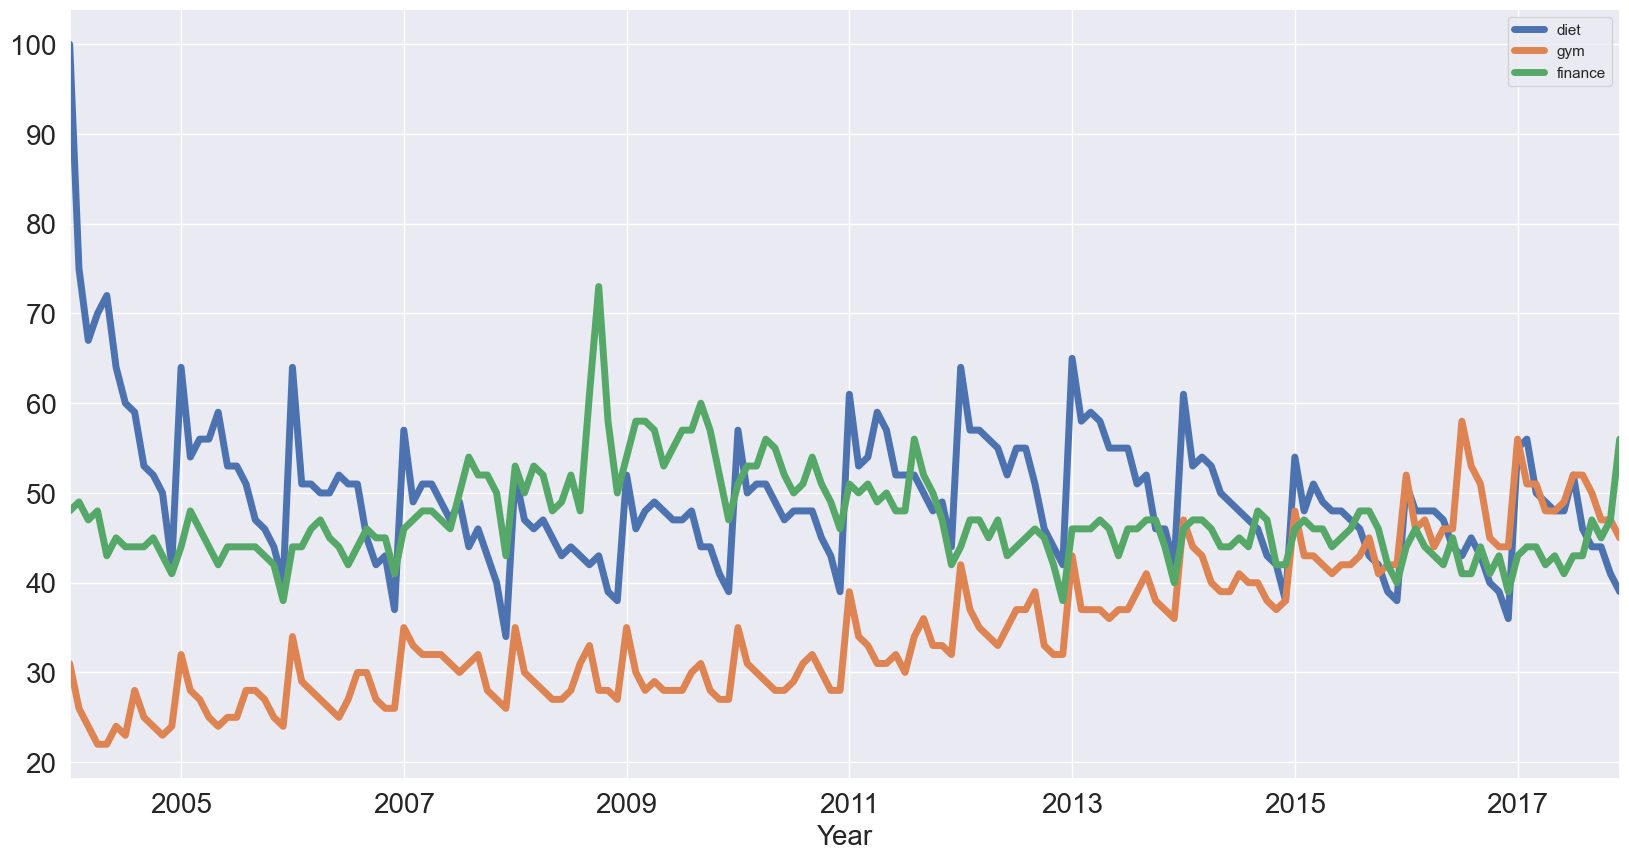

In [12]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

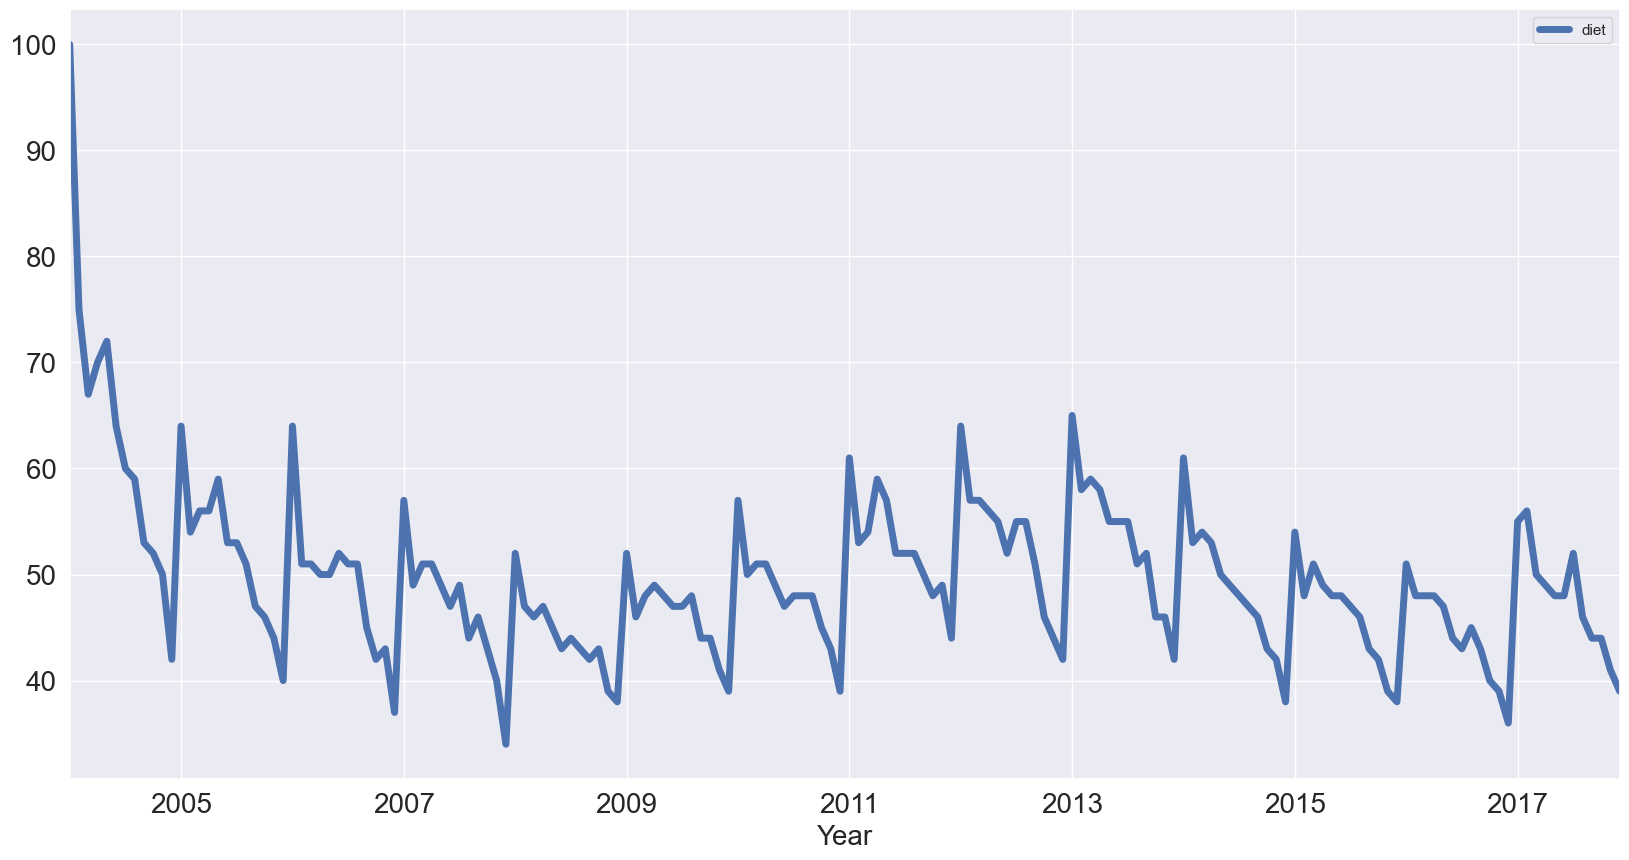

In [13]:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

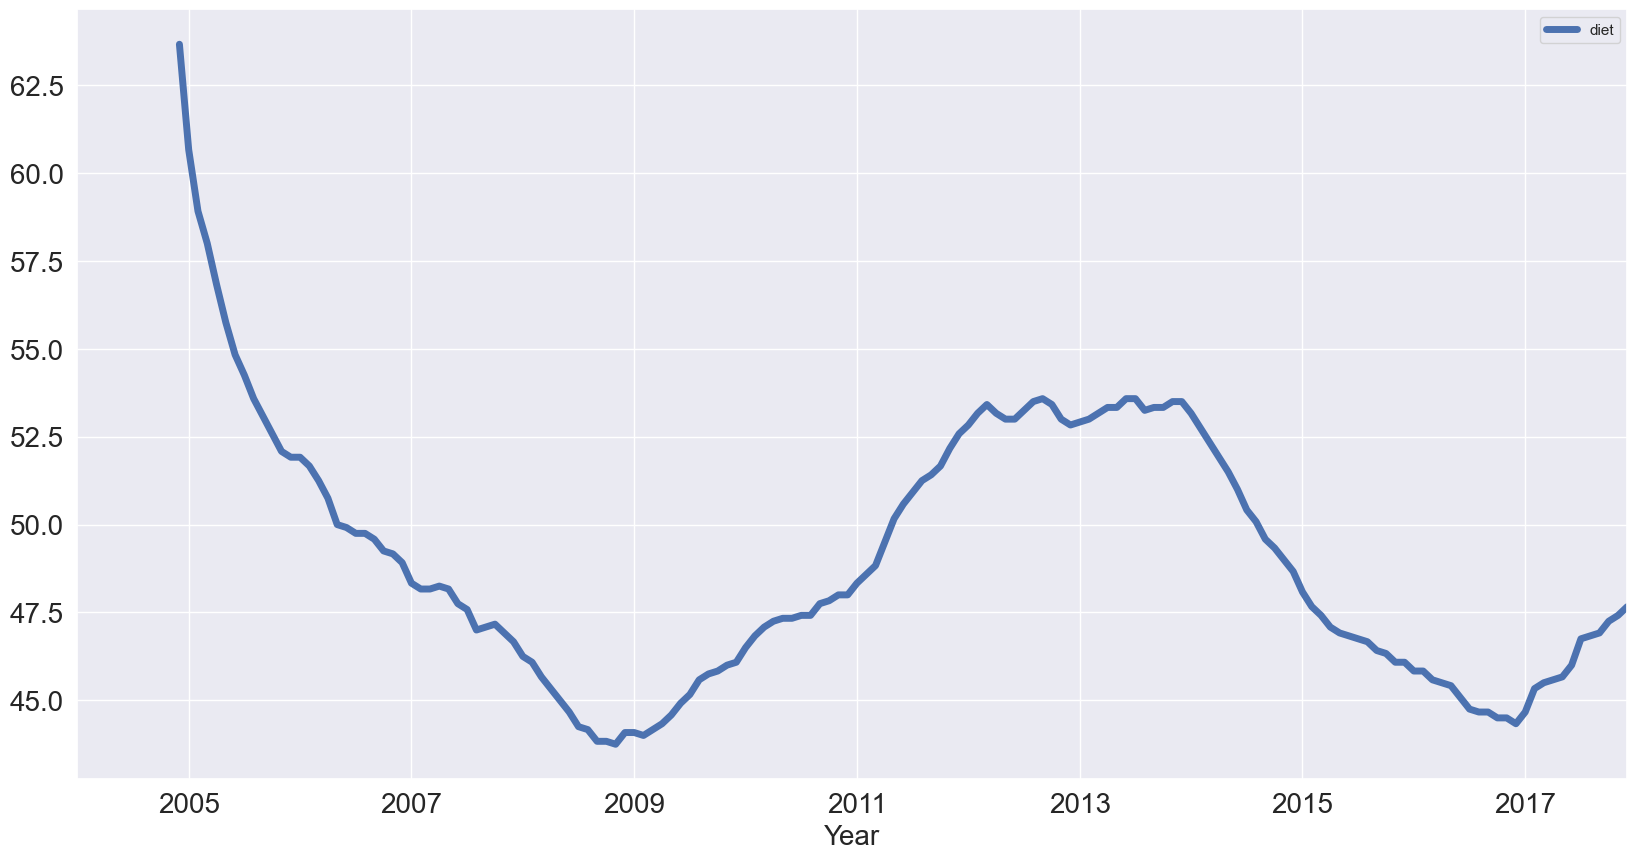

In [14]:
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

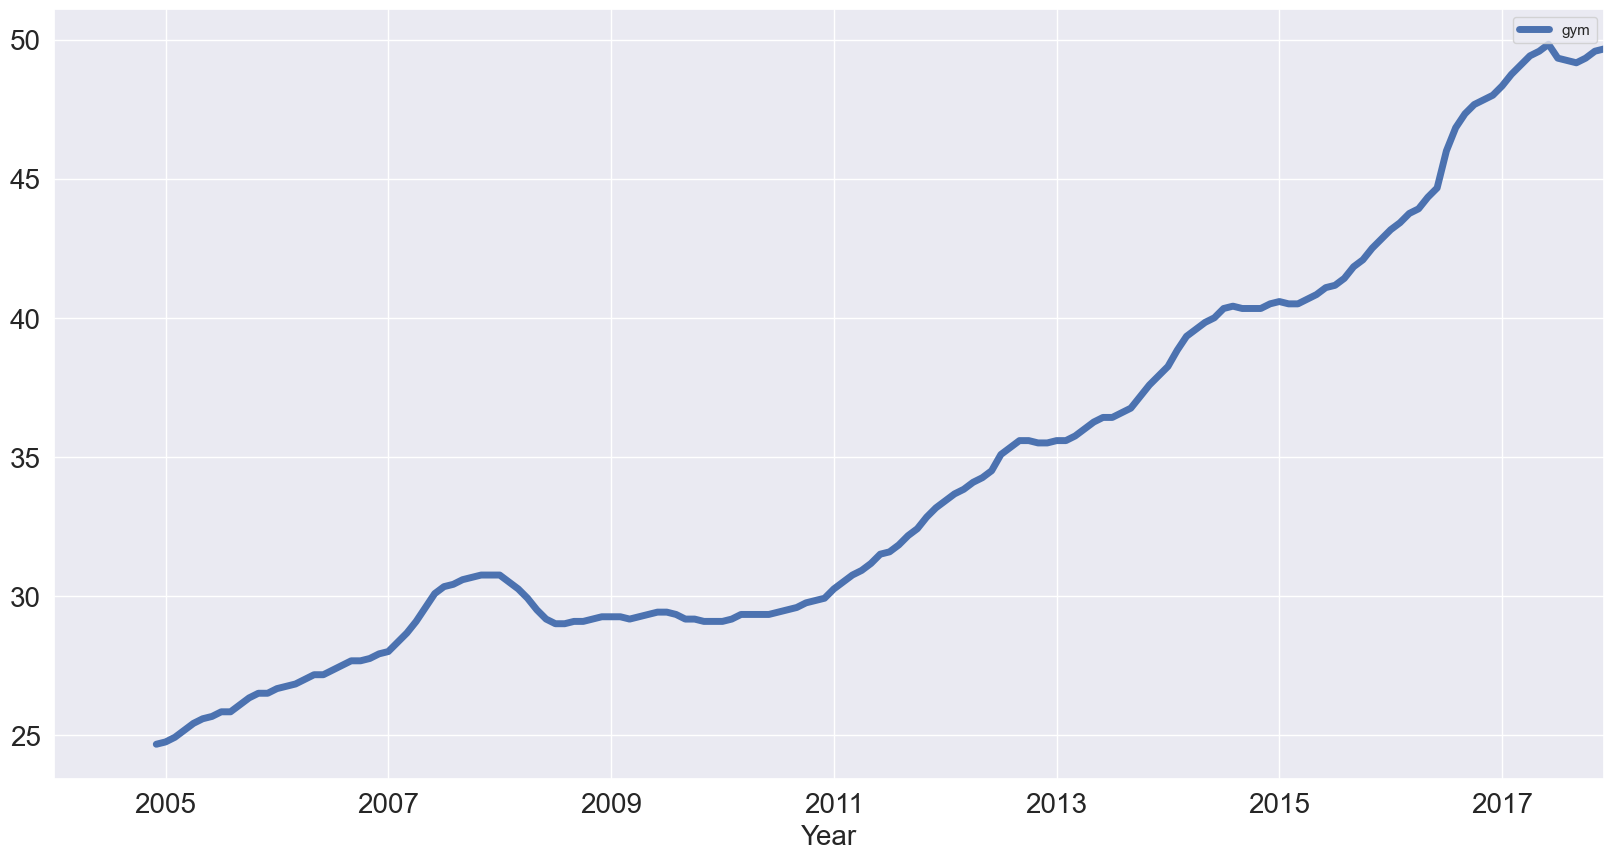

In [15]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

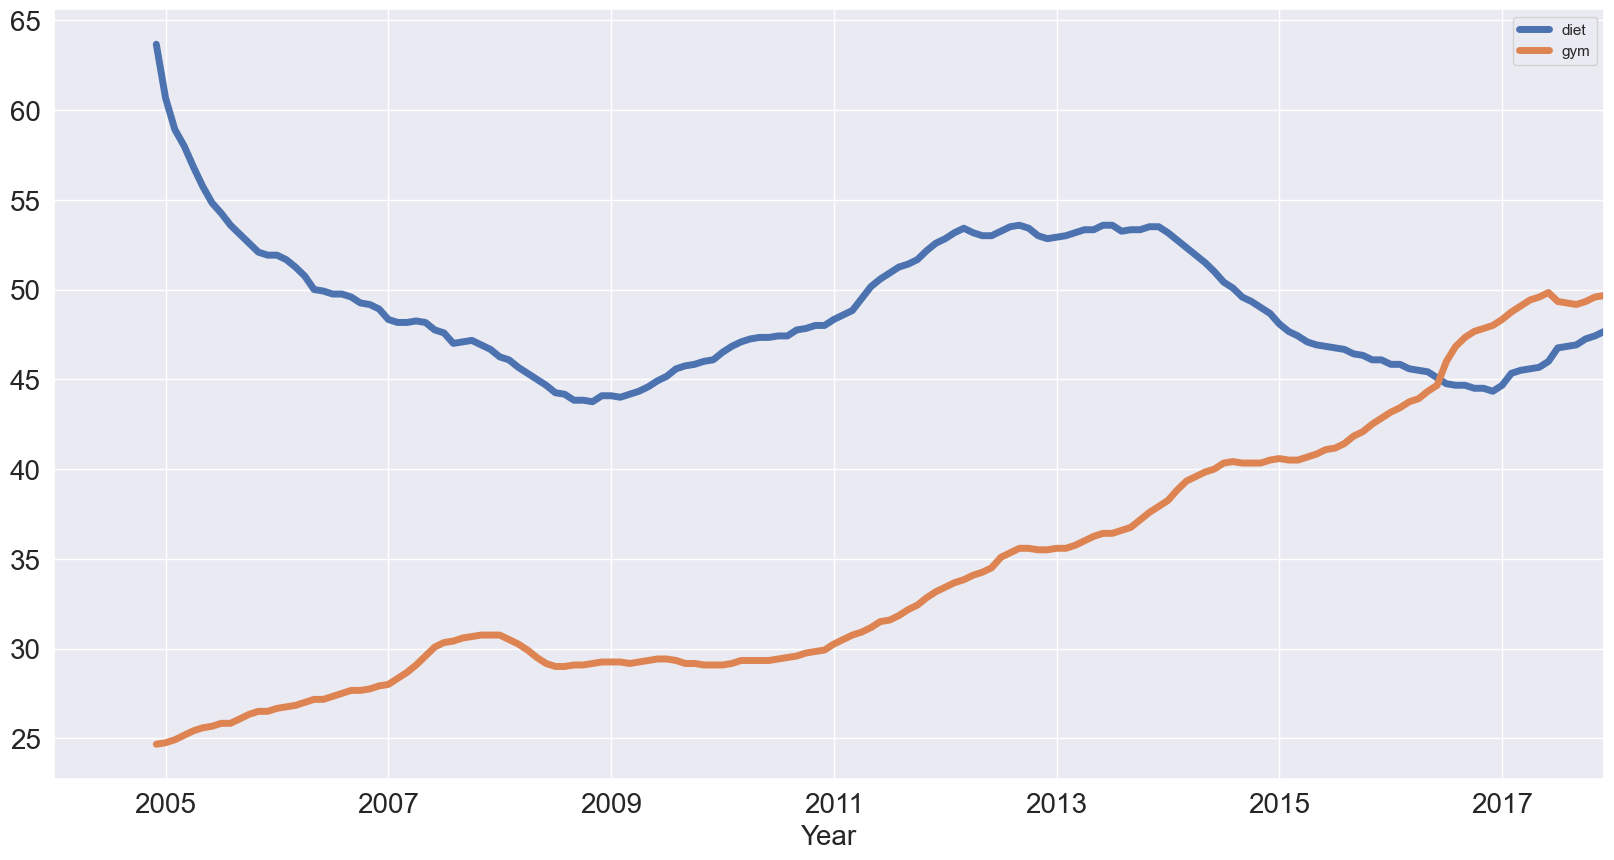

In [16]:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

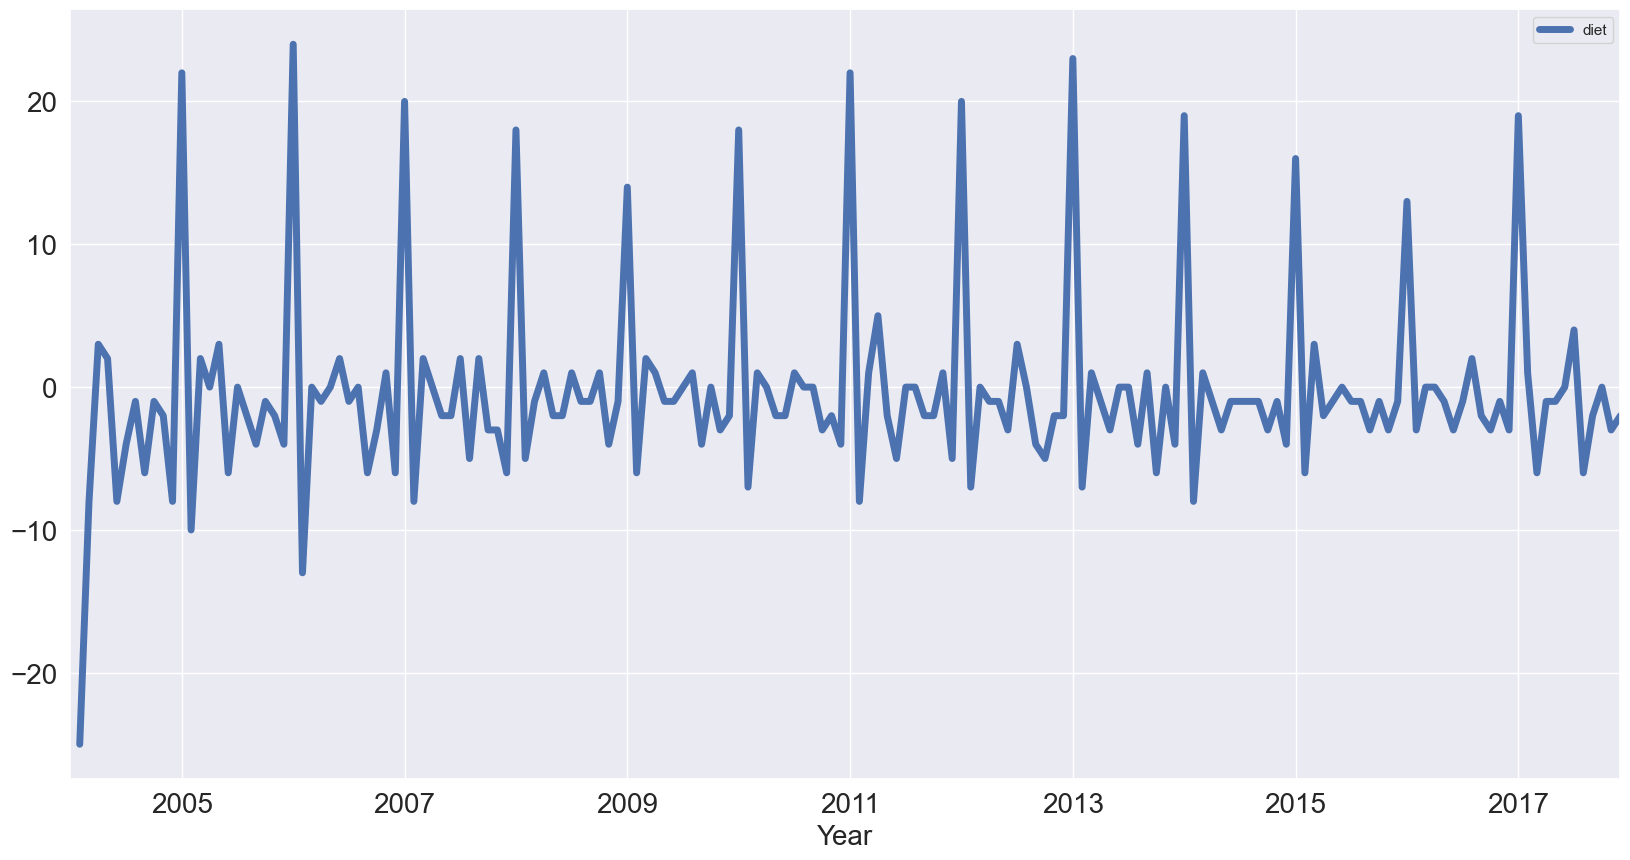

In [17]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

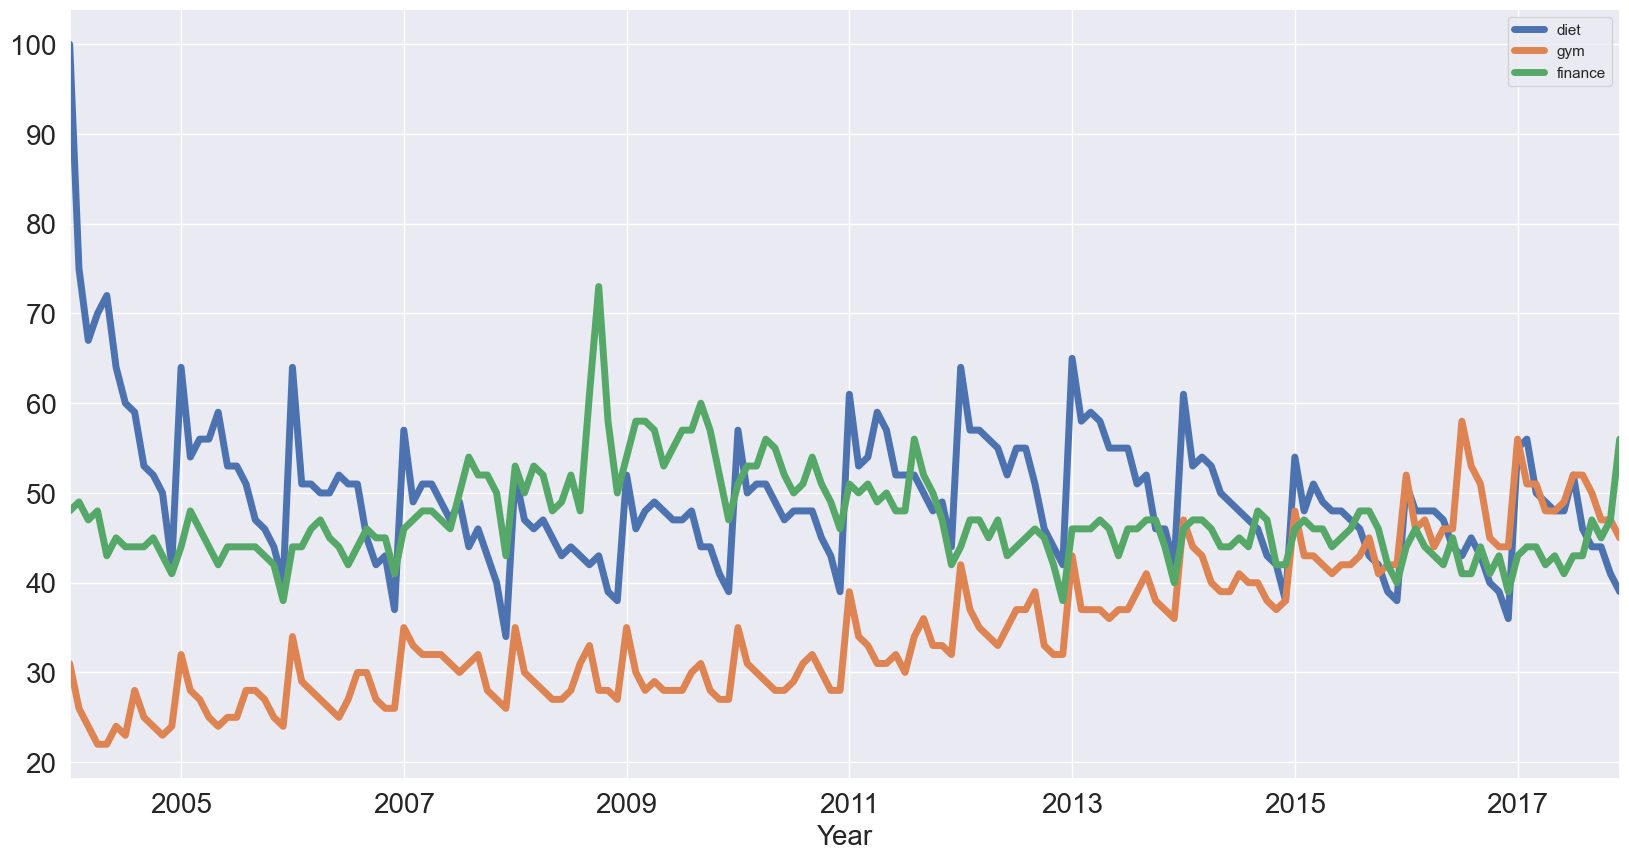

In [18]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [19]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


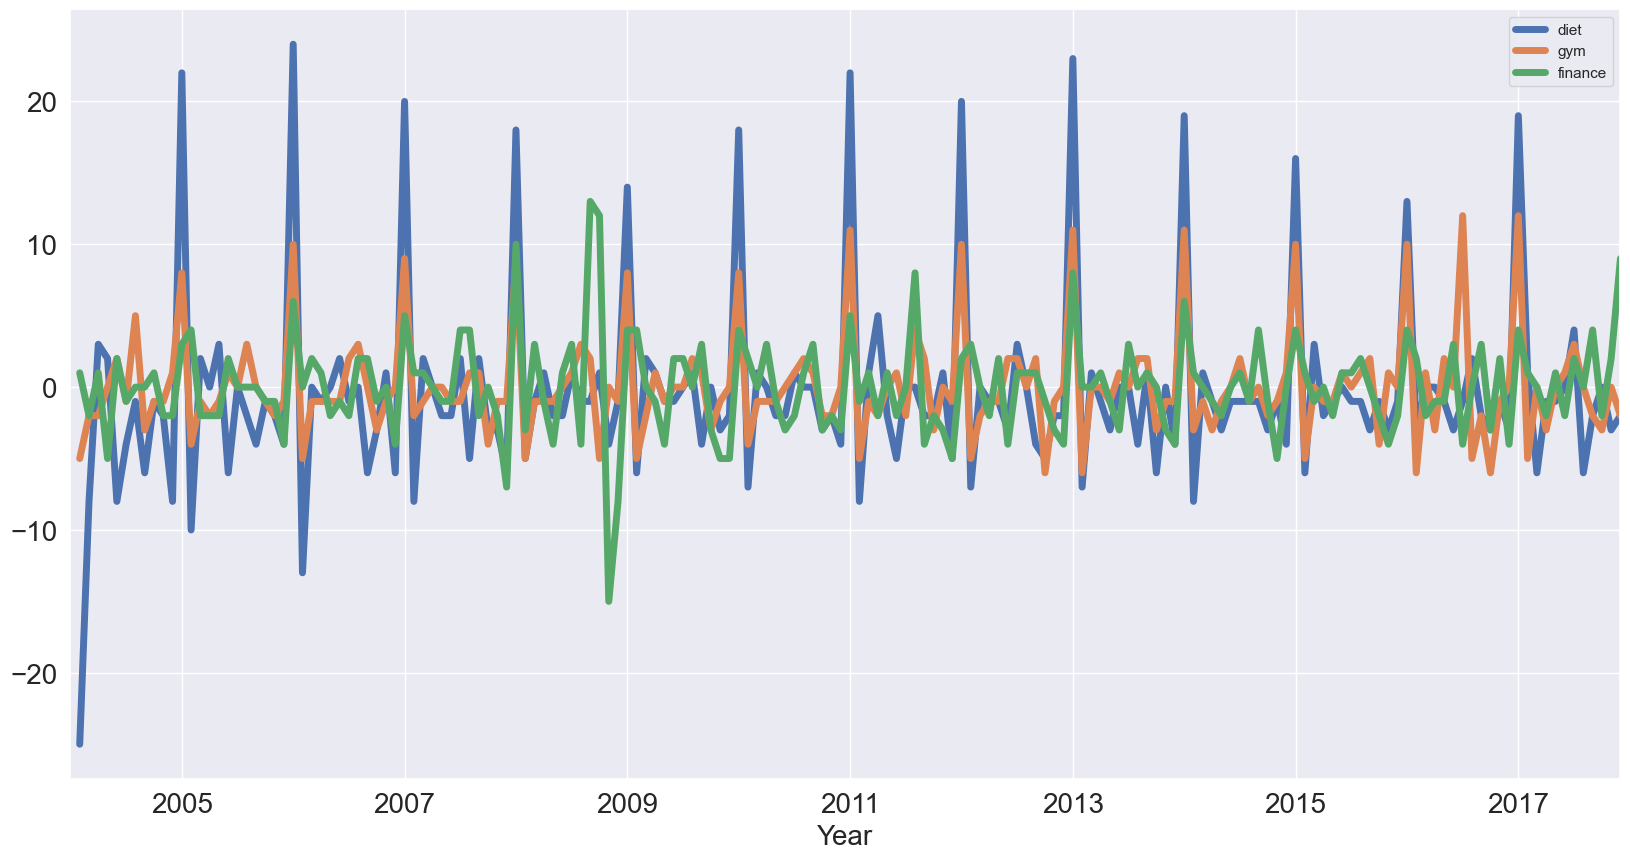

In [20]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [21]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


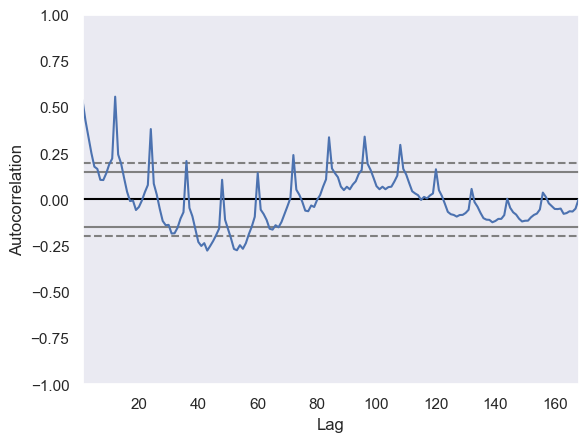

In [22]:
pd.plotting.autocorrelation_plot(diet);